In [1192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1193]:
train = pd.read_csv('space_ship_titanic/train.csv')
test = pd.read_csv('space_ship_titanic/test.csv')

* train.csv - Personal records for about two-thirds (ca. 8700) of the passengers, to be used as training data.
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* test.csv - Personal records for the remaining one-third (ca. 4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
* sample_submission.csv - A submission file in the correct format.
* PassengerId - Id for each passenger in the test set.
* Transported - The target. For each passenger, predict either True or False.


# Over all EDA
* ### Missing Values
* ### Description
* ### Datetypes
* ### Distribution

In [1194]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1195]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [1196]:
missing_train = pd.DataFrame(train.isna().sum())
missing_train["Missing_total"] = missing_train[0]/train.shape[0]

print(missing_train["Missing_total"].sort_values(ascending=True))
print(train.shape)

PassengerId     0.000000
Transported     0.000000
Age             0.020591
RoomService     0.020821
Destination     0.020936
FoodCourt       0.021051
Spa             0.021051
VRDeck          0.021627
Cabin           0.022892
Name            0.023007
HomePlanet      0.023122
VIP             0.023352
ShoppingMall    0.023927
CryoSleep       0.024963
Name: Missing_total, dtype: float64
(8693, 14)


In [1197]:
missing_test = pd.DataFrame(test.isna().sum())
missing_test["Missing_total"] = missing_test[0]/test.shape[0]
print(missing_test["Missing_total"].sort_values(ascending=True))
print(test.shape)

PassengerId     0.000000
VRDeck          0.018705
RoomService     0.019172
HomePlanet      0.020341
Age             0.021277
Destination     0.021510
CryoSleep       0.021744
VIP             0.021744
Name            0.021978
ShoppingMall    0.022913
Cabin           0.023381
Spa             0.023615
FoodCourt       0.024784
Name: Missing_total, dtype: float64
(4277, 13)


# EDA

In [1198]:
vip_mask = (train['VIP'] == True) & (train['Transported'] == True)
vip_survivors = round((len(train[vip_mask]) / len(train[train['VIP'] == True]) * 100), 2)
print(f'Out of all VIPs, only {vip_survivors} % survived.')

Out of all VIPs, only 38.19 % survived.


<AxesSubplot:ylabel='Frequency'>

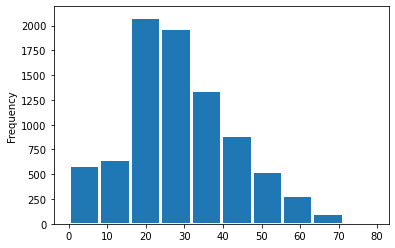

In [1199]:
# Majority of the passangers are in their 20s and 30s
train.Age.plot(kind='hist', edgecolor='white', linewidth=3)

<AxesSubplot:ylabel='CryoSleep'>

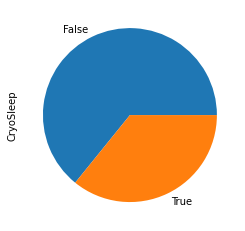

In [1200]:
train.CryoSleep.value_counts().plot(kind='pie')

In [1201]:
train_num = [f for f in train.columns if train[f].dtype == "float64"]
train_cat = [f for f in train.columns if train[f].dtype == "object"]


# Distribution of numeric columns

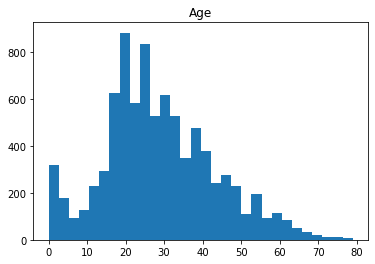

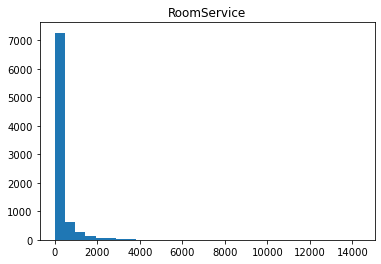

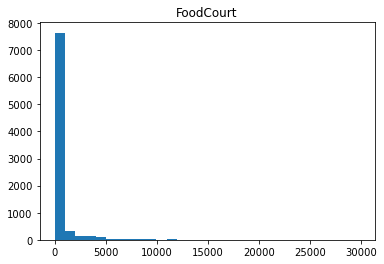

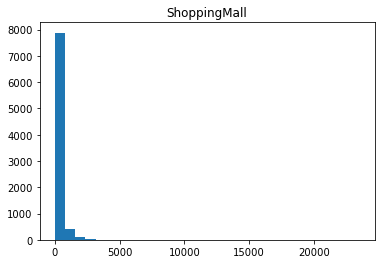

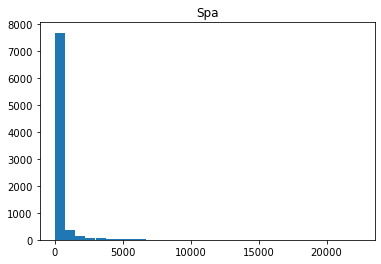

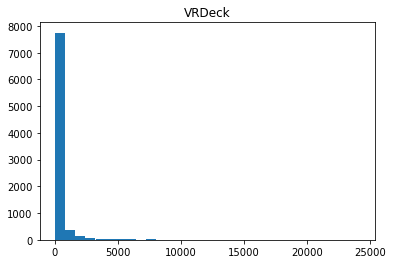

In [1202]:
for i in train_num:
  plt.hist(train[i], bins=30)
  plt.title(i)
  plt.show()

<AxesSubplot:>

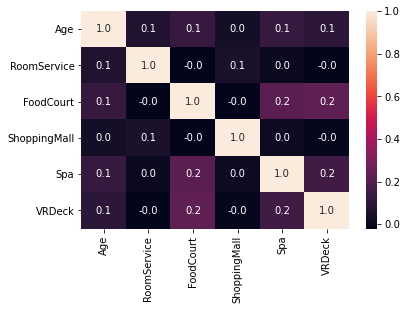

In [1203]:
# Mal Korrelation nur bei Leuten checken die nicht im Cryoschlaf sind
corr = train[train_num].corr()
sns.heatmap(corr, annot = True, fmt=".1f")

# Conclusion Correlation
Numerical features are not very high correlated among each other, thus we should keep all features!

Next Step: Find correlation to targer variable - somehow! 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

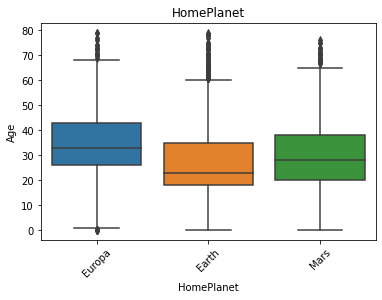

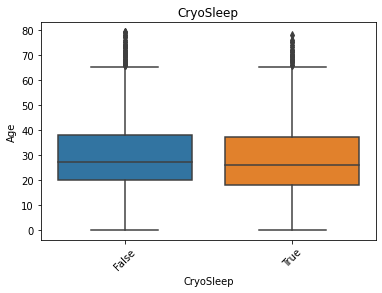

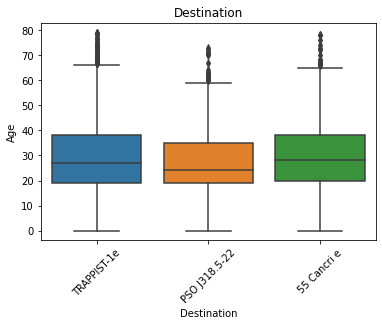

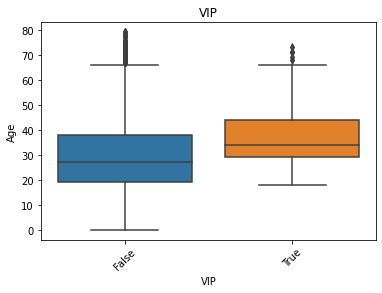

In [1204]:
# distribution among Age among categorical features
for z in ["PassengerId", "Name", "Cabin"]:
   train_cat.remove(z)

for c in train_cat:
    sns.boxplot(data = train, x = train[c], y = train["Age"])
    plt.title(c)
    plt.xticks(rotation = 45)
    plt.show()

In [1205]:
# survival dependent on Destination
train.pivot_table(index="Transported", columns="Destination", values="PassengerId", aggfunc="count")

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Transported,,,
False,702,395,3128
True,1098,401,2787


In [1206]:
# survival dependent on HomePlanet
train.pivot_table(index="Transported", columns="HomePlanet", values="PassengerId", aggfunc= "count")

HomePlanet,Earth,Europa,Mars
Transported,,,
False,2651,727,839
True,1951,1404,920


In [1207]:
# survival dependent on CryoSleep
train.pivot_table(index="Transported", columns="CryoSleep", values="PassengerId", aggfunc= "count")

CryoSleep,False,True
Transported,,
False,3650,554
True,1789,2483


In [1208]:
# survival dependent on VIP
train.pivot_table(index="Transported", columns="VIP", values="PassengerId", aggfunc= "count")

VIP,False,True
Transported,,
False,4093,123
True,4198,76


In [1209]:
# survival dependent on VIP
train.pivot_table(index="Transported", columns="Cabin", values="PassengerId", aggfunc= "count").T

Transported,False,True
Cabin,,
A/0/P,1.0,1.0
A/0/S,2.0,NaN
A/1/S,NaN,3.0
A/10/P,1.0,NaN
A/10/S,NaN,1.0
...,...,...
T/0/P,1.0,NaN
T/1/P,1.0,NaN
T/2/P,1.0,NaN


In [1210]:
# how many ppl have survived with cryosleep 
cryo_df_count = train.groupby(["Transported", "CryoSleep"]).count().reset_index()
cryo_df_count
#jetzt noch Service_x_count um herauszufinden, wie viele Personen pro Service gestorben sind

,Transported,CryoSleep,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,False,False,3650,3563,3571,3564,3580,3576,3569,3576,3578,3571,3571,3569
1,False,True,554,544,537,551,536,535,538,546,538,543,545,542
2,True,False,1789,1752,1760,1745,1763,1742,1759,1753,1757,1755,1749,1742
3,True,True,2483,2418,2416,2438,2419,2427,2431,2421,2403,2429,2430,2433


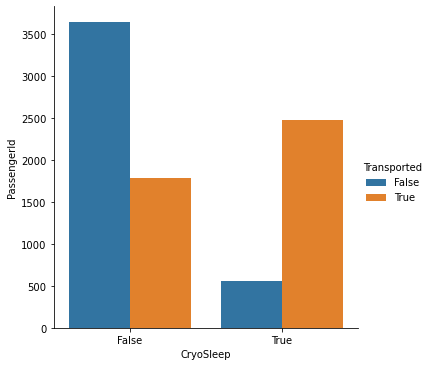

In [1211]:
sns.catplot(data = cryo_df_count , x="CryoSleep", y = "PassengerId" , hue="Transported", kind="bar")

In [1212]:
cryo_df_mean = train.groupby(["Transported", "CryoSleep"]).mean()
cryo_df_mean=pd.DataFrame(cryo_df_mean.stack()).reset_index()
cryo_df_mean

,Transported,CryoSleep,level_2,0
0,False,False,Age,30.693575
1,False,False,RoomService,448.336229
2,False,False,FoodCourt,442.368009
3,False,False,ShoppingMall,192.315260
4,False,False,Spa,652.046206
5,False,False,VRDeck,627.053766
6,False,True,Age,24.930970
7,False,True,RoomService,0.000000
8,False,True,FoodCourt,0.000000
9,False,True,ShoppingMall,0.000000


<Figure size 720x864 with 0 Axes>

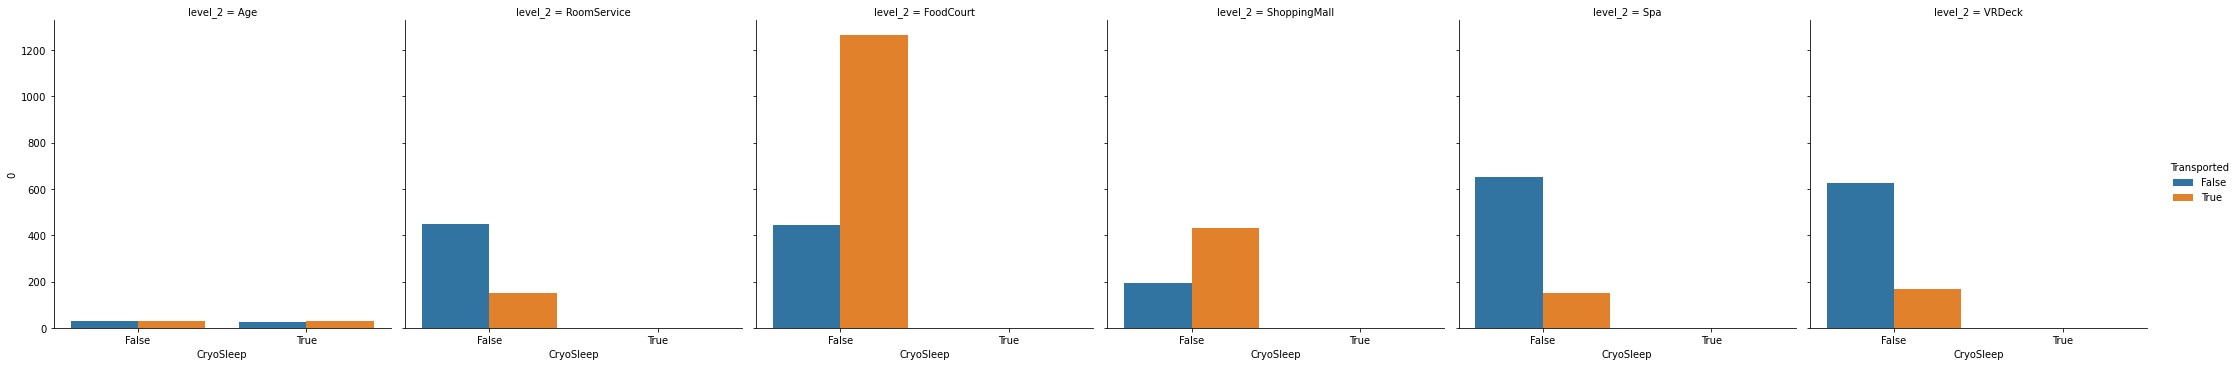

In [1213]:
plt.figure(figsize=(10,12))
sns.catplot(data = cryo_df_mean , x="CryoSleep", y = 0 , 
            hue="Transported", col="level_2",kind="bar")

In [1214]:
test.isna().sum().iloc[:]


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

# Feature engineering

In [1215]:
train.Destination.mode()

0    TRAPPIST-1e
dtype: object

In [1216]:
#train= train[~train["ShoppingMall"].isna()]
train["Age"].fillna(train.groupby("HomePlanet")["Age"].transform("mean"),inplace=True)
train["Age"].fillna(train["Age"].mean(), inplace=True)
test["Age"].fillna(test.groupby("HomePlanet")["Age"].transform("mean"),inplace=True)
test["Age"].fillna(test["Age"].mean(), inplace=True)




#train = train[~train["Age"].isna()]
#train = train.dropna()
#test = test.dropna()

In [1217]:
train["HomePlanet"].mode().values[0]

'Earth'

In [1218]:
def filling(df):
    for i in df.columns:
        df[i].fillna(df[i].mode().values[0], inplace=True)
    return df

train = filling(train)
test = filling(test)

In [1219]:
test.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [1220]:
train.Name = train.Name.astype("str")
train.Cabin = train.Cabin.astype("str")
test.Name = test.Name.astype("str")
test.Cabin = test.Cabin.astype("str")
#train = train[train["Cabin"]!="nan"]
train["cabin_side"] = train["Cabin"].apply(lambda x: x.split("/")[2])
train["cabin_deck"] = train["Cabin"].apply(lambda x: x.split("/")[0])
test["cabin_side"] = test["Cabin"].apply(lambda x: x.split("/")[2])
test["cabin_deck"] = test["Cabin"].apply(lambda x: x.split("/")[0])

# survival dependent on cabin_side
train.pivot_table(index="Transported", columns="cabin_side", values="PassengerId", aggfunc= "count")
#people on cabin with S had a higher chance to survive

cabin_side,P,S
Transported,,
False,2308,2007
True,1898,2480


In [1221]:
#find groups that traveled together
train["ticket_grp"] = train.PassengerId.apply(lambda x: x.split("_")[0])
train["surname"] = train.Name.apply(lambda x: x.split(" ")[-1])
test["ticket_grp"] = test.PassengerId.apply(lambda x: x.split("_")[0])
test["surname"] = test.Name.apply(lambda x: x.split(" ")[-1])
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_side,cabin_deck,ticket_grp,surname
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,B,0001,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,F,0002,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,A,0003,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S,A,0003,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S,F,0004,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,P,A,9276,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,S,G,9278,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,S,G,9279,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,S,E,9280,Hontichre


In [1222]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cabin_side,cabin_deck,ticket_grp,surname
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,S,G,0013,Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,S,F,0018,Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,S,C,0019,Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,S,C,0021,Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,S,F,0023,Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,S,G,9266,Peter
4273,9269_01,Earth,False,G/160/P,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,P,G,9269,Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,29.762806,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,P,D,9271,Pore
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,34.158859,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,P,D,9273,Conale


In [1223]:
# travel_grp
def travel_grp(df):
    df["travel_grp"] = 0
    for grp, grp_df in df.groupby("ticket_grp"):
        if len(grp_df)>1:

            for ind, row in grp_df.iterrows():
                grp_id = row["PassengerId"]

                df.loc[df["PassengerId"]==grp_id, "travel_grp"]= 1
    return df
      
train = travel_grp(train)
test = travel_grp(test)

    
    

In [1224]:
travelgrp_df = train.groupby(["Transported","travel_grp"]).size().reset_index()
travelgrp_df

,Transported,travel_grp,0
0,False,0,2631
1,False,1,1684
2,True,0,2174
3,True,1,2204


<AxesSubplot:xlabel='travel_grp', ylabel='0'>

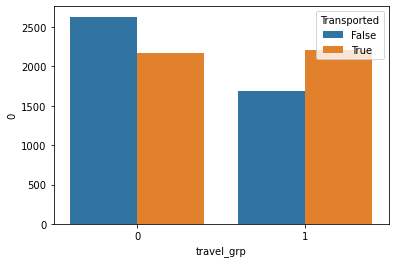

In [1225]:
sns.barplot(data=travelgrp_df, x="travel_grp", y= 0, hue="Transported")

* travel grp has an impact on the survivability of the passengers!

In [1226]:
# family
def fam_grp(df):
    df["family"] = 0
    for grp, grp_df in df.groupby("surname"):
        if len(grp_df)>1:
            for ind, row in grp_df.iterrows():
                grp_id = row["PassengerId"]
                df.loc[df["PassengerId"]==grp_id, "family"]= 1
    return df
            
train = fam_grp(train)
test = fam_grp(test)

In [1227]:
family_df = train.groupby(["Transported","family"]).size().reset_index()
family_df

,Transported,family,0
0,False,0,159
1,False,1,4156
2,True,0,223
3,True,1,4155


<AxesSubplot:xlabel='family', ylabel='0'>

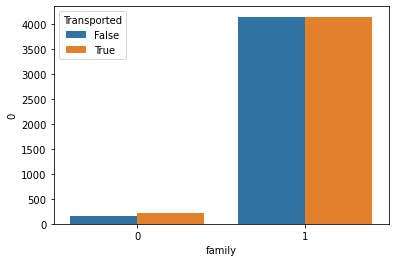

In [1228]:
sns.barplot(data=family_df, x="family", y= 0, hue="Transported")

* family column has no impact on the prediction
* maybe a combination of deck, cabin, homeplanet and money_spent

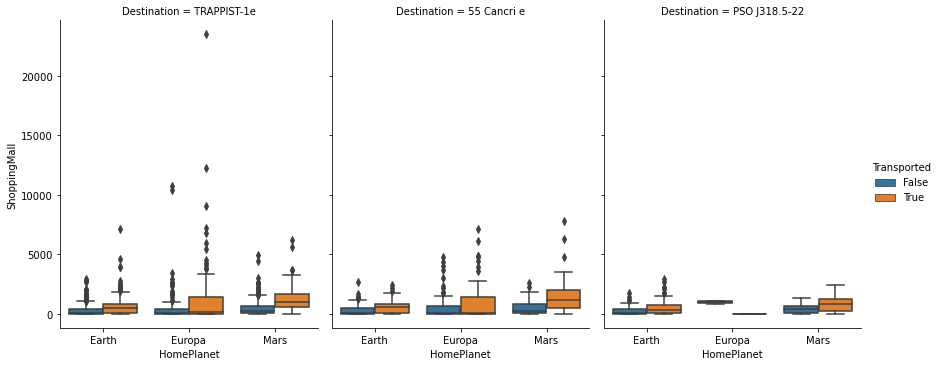

In [1229]:
sns.catplot(data=train[train["ShoppingMall"]>0], y="ShoppingMall",
            x = "HomePlanet", hue = "Transported",col = "Destination",
            kind="box", height=5, aspect=.8)

* Marsianer haben mehr ausgegeben in der Regel, wo hatten die ihre Zimmer? evtl neue Spalte, scalen oder OHE
* 

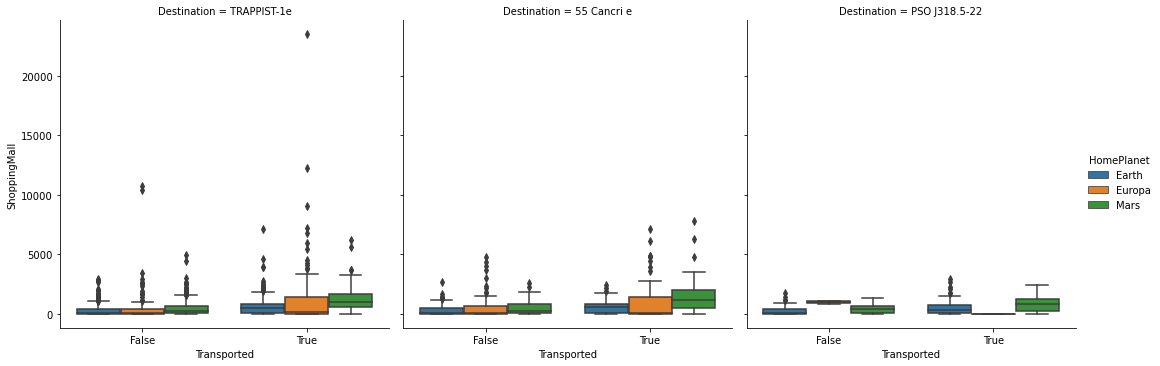

In [1230]:
sns.catplot(data=train[train["ShoppingMall"]>0], y="ShoppingMall",
            x = "Transported", hue = "HomePlanet",col = "Destination", kind="box")

* Vom Mars haben mehr ausgegeben 
* Europäer wollen nicht nach PSO

In [1231]:
train.groupby([ "Destination", "HomePlanet"])["ShoppingMall"].mean()

Destination    HomePlanet
55 Cancri e    Earth         126.592233
               Europa        124.600451
               Mars          386.642487
PSO J318.5-22  Earth          92.796703
               Europa        104.631579
               Mars          379.428571
TRAPPIST-1e    Earth         140.058736
               Europa        164.494290
               Mars          288.884641
Name: ShoppingMall, dtype: float64

In [1232]:
# sum over 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
train["spent_total"] = np.sum(train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']], axis=1)
test["spent_total"] = np.sum(test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']], axis=1)


In [1233]:

# rates for service and courts
def service_rates(df):
    rate_list = []
    for i in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:

        var= f'{i}_rate'

        df[var] = df.apply(lambda x: x[i]/x["spent_total"] if x[i]> 0 else 0, axis=1)
        rate_list.append(var)
    return df

train = service_rates(train)
test = service_rates(test)


In [1234]:
train["age_to_money"] = train.apply(lambda x: x["Age"]/ x["spent_total"] if x["spent_total"] > 0 else 0, axis=1)
train["shopping_rate"] = train.apply(lambda x: x["ShoppingMall"] / x["spent_total"] 
                                     if x["ShoppingMall"] > 0 else 0, axis=1)

test["age_to_money"] = test.apply(lambda x: x["Age"]/ x["spent_total"] if x["spent_total"] > 0 else 0, axis=1)
test["shopping_rate"] = test.apply(lambda x: x["ShoppingMall"] / x["spent_total"] 
                                     if x["ShoppingMall"] > 0 else 0, axis=1)

In [1235]:
def age_binning(x):
  if x <= 6:
    return "baby"
  if x < 13:
    return "child"
  if x < 18:
    return "teen"
  if x < 35:
    return "adult"
  if x < 60:
    return "mid"
  else:
    return "grand"

train["age_bin"] = train.Age.apply(age_binning)
test["age_bin"] = test.Age.apply(age_binning)

In [1236]:
# distribution of decks for transported ppl
decks = train.groupby(["Transported", "cabin_deck", "HomePlanet"])["PassengerId"].count().reset_index()
decks


,Transported,cabin_deck,HomePlanet,PassengerId
0,False,A,Earth,2
1,False,A,Europa,127
2,False,B,Earth,3
3,False,B,Europa,204
4,False,C,Earth,2
5,False,C,Europa,237
6,False,D,Earth,6
7,False,D,Europa,77
8,False,D,Mars,188
9,False,E,Earth,261


<AxesSubplot:xlabel='cabin_deck', ylabel='PassengerId'>

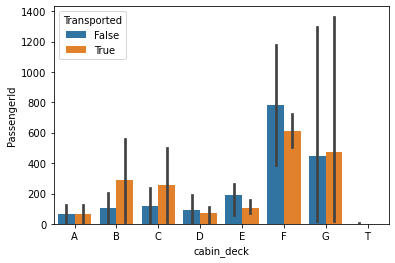

In [1237]:
# distribution of decks for transported ppl
sns.barplot(data=decks, x = "cabin_deck", y = "PassengerId", hue = "Transported")

* evtl. B und C : 3
* A, D, G: 2
* E, F: 1

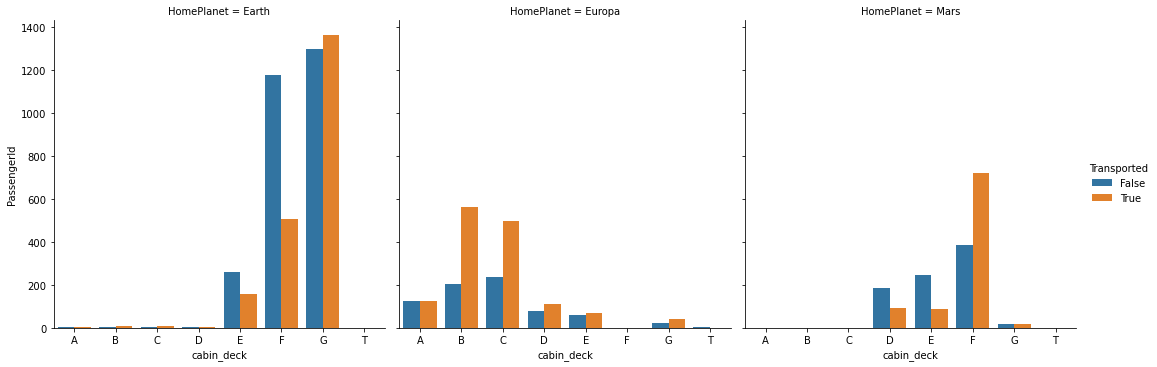

In [1238]:
sns.catplot(data=decks, x = "cabin_deck", y = "PassengerId",col="HomePlanet", hue = "Transported", kind="bar")

* Europa eher obere Decks und in B und C eher überlebt haben
* MArs D und E eher gestorben und in F eher überlebt
* Von Earth in F mehr gestorben, insgesamt mehr Menschen und auf Deck F hohe W'keit für Tod


In [1239]:
def planet_deck(df):
    df["planet_deck"] = df["cabin_deck"]+"_"+df["HomePlanet"]
    return df
train = planet_deck(train)
test = planet_deck(test)

In [1240]:
# distribution of money spent on each court/service
transported_spent = pd.melt(train, id_vars="Transported", value_vars=["RoomService", "FoodCourt", "ShoppingMall"
                                               , "Spa", "VRDeck"])

In [1241]:
transported_spent

,Transported,variable,value
0,False,RoomService,0.0
1,True,RoomService,109.0
2,False,RoomService,43.0
3,False,RoomService,0.0
4,True,RoomService,303.0
...,...,...,...
43460,False,VRDeck,74.0
43461,False,VRDeck,0.0
43462,True,VRDeck,0.0
43463,False,VRDeck,3235.0


<Figure size 720x1080 with 0 Axes>

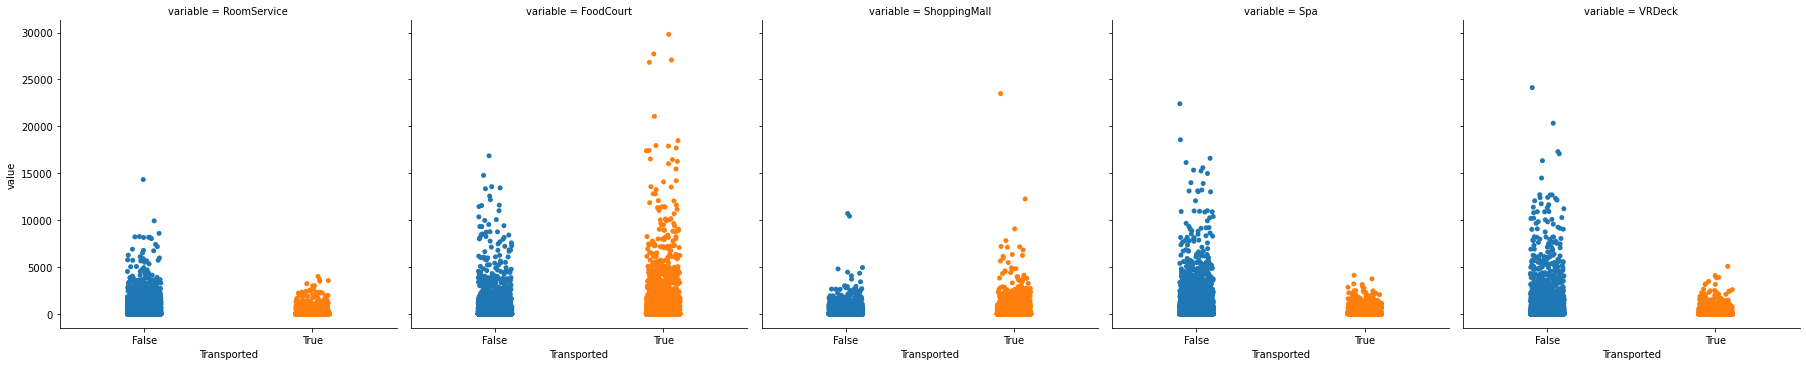

In [1242]:
# distribution of money spent on each court/service
plt.figure(figsize=(10,15))
sns.catplot(data = transported_spent, y = "value"  , x="Transported", col="variable")


* im Spa und im VRDeck sind die leute eher gestorben wenn sie im durchschnitt mehr Geld ausgegeben haben
    * if spa_money > 3k, dann 1 für tod
    * if vrdeck_money > 3k, dann 1 für tod

### How many ppl died/survived on each Service/Court 

In [1243]:
# How many ppl died/survived on each Service/Court
transported_real_spent = transported_spent[transported_spent["value"]>0]
transported_real_spent

,Transported,variable,value
1,True,RoomService,109.0
2,False,RoomService,43.0
4,True,RoomService,303.0
6,True,RoomService,42.0
11,True,RoomService,39.0
...,...,...,...
43458,False,VRDeck,34.0
43459,True,VRDeck,330.0
43460,False,VRDeck,74.0
43463,False,VRDeck,3235.0


(array([2935.,    0., 3054.,    0.,    0., 2898.,    0., 3186.,    0.,
        3010.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

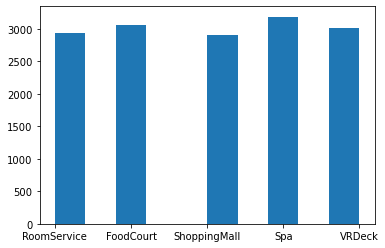

In [1244]:
plt.hist(data=transported_real_spent,x="variable")

In [1245]:
# How many ppl died/survived on each Service/Court
money_service_count = transported_real_spent.groupby(["Transported", "variable"]).size().reset_index()
money_service_count


,Transported,variable,0
0,False,FoodCourt,1999
1,False,RoomService,2172
2,False,ShoppingMall,1979
3,False,Spa,2302
4,False,VRDeck,2181
5,True,FoodCourt,1055
6,True,RoomService,763
7,True,ShoppingMall,919
8,True,Spa,884
9,True,VRDeck,829


<AxesSubplot:xlabel='variable', ylabel='0'>

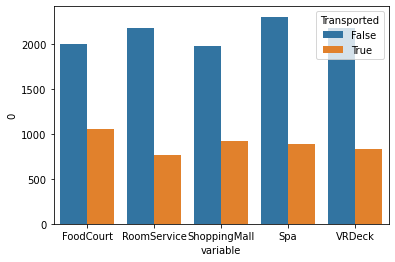

In [1246]:

sns.barplot(data=money_service_count, x="variable", y = 0, hue="Transported" )

* wirkt sehr ausgeglichen, demnach nichts aussagend
* wie können wir das besser differenzieren, evtl homeplanet + deck + money_spent_service
* vllt klasse einführen: klasse 1, 2 und 3 für Erde, Europa und Mars

In [1247]:
# list of the services rates to scale
rate_list

['RoomService_rate',
 'FoodCourt_rate',
 'ShoppingMall_rate',
 'Spa_rate',
 'VRDeck_rate']

In [1299]:
train_1 = train.copy()
test_1 = test.copy()

In [1300]:
train_1["train_test"] = 1
test_1["train_test"] = 0
data = train.append(test)

In [1301]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# we can add gridsearch for Standardscaler, MinMaxScaler or Log on numerical features

scale = MinMaxScaler()
data[["spent_total" ,"shopping_rate",'RoomService_rate', 'FoodCourt_rate', 'ShoppingMall_rate',
 'Spa_rate', 'VRDeck_rate', "age_to_money"]] = scale.fit_transform(data[["spent_total" ,"shopping_rate",'RoomService_rate', 'FoodCourt_rate',
 'ShoppingMall_rate', 'Spa_rate', 'VRDeck_rate', "age_to_money"]])



In [1302]:
cat_columns = ['CryoSleep', "HomePlanet",'cabin_side', "cabin_deck", "age_bin", "planet_deck", 
               "Destination", "travel_grp"]

feature_columns = [ 'spent_total','CryoSleep', 'Transported',"shopping_rate","HomePlanet",'cabin_side',
                   "cabin_deck",'RoomService_rate', 'FoodCourt_rate', "travel_grp", "age_to_money",
                 'ShoppingMall_rate', 'Spa_rate', 'VRDeck_rate', "planet_deck", "Destination", "age_bin",
                  "train_test"] 


data_df = data[feature_columns]

In [1303]:
data_df

,spent_total,CryoSleep,Transported,shopping_rate,HomePlanet,cabin_side,cabin_deck,RoomService_rate,FoodCourt_rate,travel_grp,age_to_money,ShoppingMall_rate,Spa_rate,VRDeck_rate,planet_deck,Destination,age_bin,train_test
0,0.000000,False,False,0.000000,Europa,P,B,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,B_Europa,TRAPPIST-1e,mid,1
1,0.020452,False,True,0.033967,Earth,S,F,0.148098,0.012228,0,0.000679,0.033967,0.745924,0.059783,F_Earth,TRAPPIST-1e,adult,1
2,0.288521,False,False,0.000000,Europa,S,A,0.004141,0.344409,1,0.000116,0.000000,0.646730,0.004719,A_Europa,TRAPPIST-1e,mid,1
3,0.143830,False,False,0.071677,Europa,S,A,0.000000,0.247875,1,0.000133,0.071677,0.643161,0.037287,A_Europa,TRAPPIST-1e,adult,1
4,0.030317,False,True,0.138405,Earth,S,F,0.277727,0.064161,0,0.000306,0.138405,0.517874,0.001833,F_Earth,TRAPPIST-1e,teen,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.000000,True,NaN,0.000000,Earth,S,G,0.000000,0.000000,1,0.000000,0.000000,0.000000,0.000000,G_Earth,TRAPPIST-1e,adult,0
4273,0.028288,False,NaN,0.016699,Earth,P,G,0.000000,0.832024,0,0.000860,0.016699,0.009823,0.141454,G_Earth,TRAPPIST-1e,mid,0
4274,0.000000,True,NaN,0.000000,Mars,P,D,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,D_Mars,55 Cancri e,adult,0
4275,0.089004,False,NaN,0.000000,Europa,P,D,0.000000,0.836716,0,0.000222,0.000000,0.000000,0.163284,D_Europa,TRAPPIST-1e,adult,0


In [1304]:
train_df = data_df[data_df["train_test"]==1]

#train_df.drop(["train_test", "Transported"], axis=1, inplace=True)

In [1305]:
train_ohe = pd.get_dummies(data=train_df, columns=cat_columns, drop_first=True)
train_ohe

,spent_total,Transported,shopping_rate,RoomService_rate,FoodCourt_rate,age_to_money,ShoppingMall_rate,Spa_rate,VRDeck_rate,train_test,...,planet_deck_F_Earth,planet_deck_F_Mars,planet_deck_G_Earth,planet_deck_G_Europa,planet_deck_G_Mars,planet_deck_T_Earth,planet_deck_T_Europa,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,travel_grp_1
0,0.000000,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,...,0,0,0,0,0,0,0,0,1,0
1,0.020452,True,0.033967,0.148098,0.012228,0.000679,0.033967,0.745924,0.059783,1,...,1,0,0,0,0,0,0,0,1,0
2,0.288521,False,0.000000,0.004141,0.344409,0.000116,0.000000,0.646730,0.004719,1,...,0,0,0,0,0,0,0,0,1,1
3,0.143830,False,0.071677,0.000000,0.247875,0.000133,0.071677,0.643161,0.037287,1,...,0,0,0,0,0,0,0,0,1,1
4,0.030317,True,0.138405,0.277727,0.064161,0.000306,0.138405,0.517874,0.001833,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.237197,False,0.000000,0.000000,0.798852,0.000100,0.000000,0.192479,0.008669,1,...,0,0,0,0,0,0,0,0,0,0
8689,0.000000,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,...,0,0,1,0,0,0,0,1,0,0
8690,0.052047,True,0.999466,0.000000,0.000000,0.000289,0.999466,0.000534,0.000000,1,...,0,0,1,0,0,0,0,0,1,0
8691,0.128852,False,0.000000,0.000000,0.226224,0.000144,0.000000,0.076127,0.697649,1,...,0,0,0,0,0,0,0,0,0,1


In [1306]:
test_df = data_df[data_df["train_test"]==0]
test_df.drop(["train_test", "Transported"], axis=1, inplace=True)

/Users/benjamin.korke/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1307]:
test_ohe = pd.get_dummies(data=test_df, columns=cat_columns, drop_first=True)
test_ohe

,spent_total,shopping_rate,RoomService_rate,FoodCourt_rate,age_to_money,ShoppingMall_rate,Spa_rate,VRDeck_rate,CryoSleep_True,HomePlanet_Europa,...,planet_deck_E_Mars,planet_deck_F_Earth,planet_deck_F_Mars,planet_deck_G_Earth,planet_deck_G_Europa,planet_deck_G_Mars,planet_deck_T_Europa,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,travel_grp_1
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0.078695,0.000000,0.000000,0.003178,0.000140,0.000000,0.996822,0.000000,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.206130,0.000000,0.000000,0.896738,0.000107,0.000000,0.024400,0.078862,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.017923,0.984496,0.015504,0.000000,0.000646,0.984496,0.000000,0.000000,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,...,0,0,0,1,0,0,0,0,1,1
4273,0.028288,0.016699,0.000000,0.832024,0.000860,0.016699,0.009823,0.141454,0,0,...,0,0,0,1,0,0,0,0,1,0
4274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
4275,0.089004,0.000000,0.000000,0.836716,0.000222,0.000000,0.000000,0.163284,0,1,...,0,0,0,0,0,0,0,0,1,0


In [1308]:
X = train_ohe.drop(['Transported', "train_test"], axis=1)
y = train_ohe.Transported.values

In [1309]:
X

,spent_total,shopping_rate,RoomService_rate,FoodCourt_rate,age_to_money,ShoppingMall_rate,Spa_rate,VRDeck_rate,CryoSleep_True,HomePlanet_Europa,...,planet_deck_F_Earth,planet_deck_F_Mars,planet_deck_G_Earth,planet_deck_G_Europa,planet_deck_G_Mars,planet_deck_T_Earth,planet_deck_T_Europa,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,travel_grp_1
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.020452,0.033967,0.148098,0.012228,0.000679,0.033967,0.745924,0.059783,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0.288521,0.000000,0.004141,0.344409,0.000116,0.000000,0.646730,0.004719,0,1,...,0,0,0,0,0,0,0,0,1,1
3,0.143830,0.071677,0.000000,0.247875,0.000133,0.071677,0.643161,0.037287,0,1,...,0,0,0,0,0,0,0,0,1,1
4,0.030317,0.138405,0.277727,0.064161,0.000306,0.138405,0.517874,0.001833,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.237197,0.000000,0.000000,0.798852,0.000100,0.000000,0.192479,0.008669,0,1,...,0,0,0,0,0,0,0,0,0,0
8689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,...,0,0,1,0,0,0,0,1,0,0
8690,0.052047,0.999466,0.000000,0.000000,0.000289,0.999466,0.000534,0.000000,0,0,...,0,0,1,0,0,0,0,0,1,0
8691,0.128852,0.000000,0.000000,0.226224,0.000144,0.000000,0.076127,0.697649,0,1,...,0,0,0,0,0,0,0,0,0,1


In [1310]:
y = y.astype("int")

In [1311]:
for i in X.columns:
    if i not in test_ohe.columns:
        X.drop(i, axis=1, inplace=True)

# Prediction

In [1312]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import xgboost as xgb

In [1313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
                       

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

In [1314]:
X.drop(drop_list, axis=1, inplace=True)
test_ohe.drop(drop_list, axis=1, inplace=True)

In [1316]:
# Param grid for random search
params = {
        #"booster" : ["booster", "dart"],
        'n_estimators' : [  100,200,300,500,800],
        'min_child_weight': [0, 0.1, 0.2, 0.5, 1, 2, 5, 10],
        'gamma': [ 0.1,  1, 2, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'learning_rate': [0.01, 0.05, 0.07,0.1],
        'max_depth': [2,5,6,9,],
        #"max_delta_step" : [0,1,5,10],
        "objective": ["binary:hinge", "binary:logitraw"]
        }
    
# Instantiate and test the model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False )#gamma=10, learning_rate=0.05, max_depth=9,use_label_encoder=False,min_child_weight=1, n_estimators=500, subsample=0.8)
rs_model = RandomizedSearchCV(xgb_clf, param_distributions=params, 
                              n_iter=5, scoring='accuracy', cv=5, verbose=3, random_state=42)
rs_model.fit(X, y)
#xgb_clf.fit(X_train, y_train)
#y_pred = rs_model.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[17:48:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=10, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, objective=binary:logitraw, subsample=0.6; total time=   1.2s
[17:48:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=10, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, objective=binary:logitraw, subsample=0.6; total time=   1.0s
[17:48:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=5,
                   para

In [1317]:
rs_model.best_params_

{'subsample': 1.0,
 'objective': 'binary:hinge',
 'n_estimators': 500,
 'min_child_weight': 0.5,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 1}

In [1318]:
# XGB
# TRAIN-TEST_SPLIT
# y_hat = xgb_clf.predict(X_test)
y_hat = rs_model.predict(X)
print(accuracy_score(y, y_hat))


0.870815598757621


In [1319]:
# XGB real Test Data
kaggle_pred = rs_model.predict(test_ohe).astype(bool)

#kaggle_pred = le.inverse_transform(kaggle_pred_raw)

In [1320]:
kaggle_pred

array([ True, False,  True, ...,  True,  True,  True])

In [1321]:
len(kaggle_pred)

4277

In [1322]:
di = {
    "PassengerId": test["PassengerId"],
    "Transported" : kaggle_pred
}

submission = pd.DataFrame(data=di)
submission["Transported"] = submission["Transported"]

submission.to_csv("submission.csv", index=False)
df_sub = pd.read_csv("submission.csv")

In [1323]:
df_sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


# Documentation Results

1. mit total spent von 74,5 auf 74,6981
2. mit travel grp: 74,35%
3. total_spent, homeplanet, cryosleep 74,0
4. ['HomePlanet', 'CryoSleep', "Destination", "age_bin", "cabin_side"]
  * result: 0.7469810235767682

___


5.  Nan's all dropped
* cat_columns = ['CryoSleep',"Destination", "HomePlanet",'cabin_side', "cabin_deck"]

* zu 7 feature_columns = [ 'spent_total','CryoSleep', 'Transported',"shopping_rate","Destination",
                   "HomePlanet",'cabin_side', "cabin_deck",'RoomService_rate', 'FoodCourt_rate',
                 'ShoppingMall_rate', 'Spa_rate', 'VRDeck_rate'] 
* result: 81.4%

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1292]:
xgb_clf.fit(X_train, y_train)
importances = xgb_clf.feature_importances_

print(importances)

[17:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.03063269 0.02572851 0.00866534 0.02970367 0.03045592 0.
 0.01095493 0.0093202  0.0104989  0.02901851 0.01267442 0.01387057
 0.01442133 0.02140971 0.00669358 0.01011727 0.01089476 0.00727592
 0.         0.00891493 0.01889284 0.00633056 0.00409441 0.00985473
 0.01489884 0.         0.00883547 0.         0.0033988  0.
 0.         0.00622808 0.01820358 0.02772966 0.15024929 0.01083054
 0.01699519 0.38322803 0.00250329 0.         0.         0.0084208
 0.01219174 0.00586299]


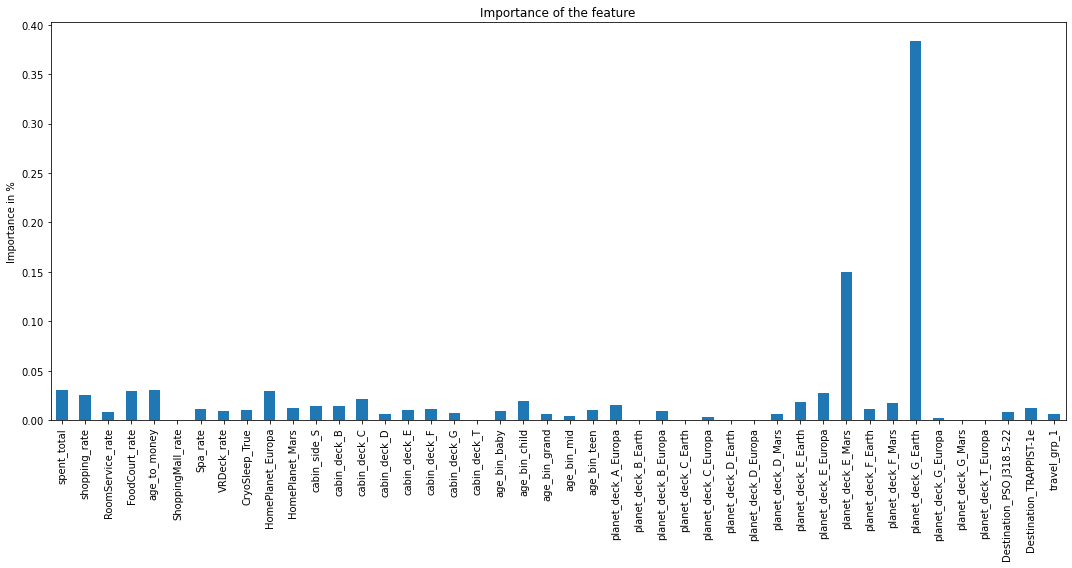

In [1293]:
importances = xgb_clf.feature_importances_
feature_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots(figsize=(15, 8))
feature_importances.plot.bar()
ax.set_title("Importance of the feature")
ax.set_ylabel("Importance in %")
fig.tight_layout()
plt.show() 

In [877]:
train_ohe.columns

Index(['spent_total', 'Transported', 'shopping_rate', 'RoomService_rate',
       'FoodCourt_rate', 'age_to_money', 'ShoppingMall_rate', 'Spa_rate',
       'VRDeck_rate', 'CryoSleep_True', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'cabin_side_S', 'cabin_deck_B', 'cabin_deck_C', 'cabin_deck_D',
       'cabin_deck_E', 'cabin_deck_F', 'cabin_deck_G', 'cabin_deck_T',
       'age_bin_baby', 'age_bin_child', 'age_bin_grand', 'age_bin_mid',
       'age_bin_teen', 'planet_deck_A_Europa', 'planet_deck_B_Earth',
       'planet_deck_B_Europa', 'planet_deck_C_Earth', 'planet_deck_C_Europa',
       'planet_deck_D_Earth', 'planet_deck_D_Europa', 'planet_deck_D_Mars',
       'planet_deck_E_Earth', 'planet_deck_E_Europa', 'planet_deck_E_Mars',
       'planet_deck_F_Earth', 'planet_deck_F_Mars', 'planet_deck_G_Earth',
       'planet_deck_G_Europa', 'planet_deck_G_Mars', 'planet_deck_T_Europa',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'travel_grp_1'],
      dtype='object')

In [1296]:
drop_list = ['cabin_deck_T', "ShoppingMall_rate", 'planet_deck_C_Earth', 'planet_deck_D_Earth', 'planet_deck_D_Europa',
            'planet_deck_G_Europa','planet_deck_T_Europa', 'age_bin_grand', 'age_bin_mid', 'age_bin_baby',
            'RoomService_rate']



